In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
import pylab


In [2]:
daily_prices = yf.download('SPY',start='2012-01-10',end='2022-12-11')

[*********************100%***********************]  1 of 1 completed


In [3]:
daily_prices.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-05,403.950012,404.929993,398.170013,399.589996,396.251160,77289800
2022-12-06,399.420013,399.989990,391.640015,393.829987,390.539276,77972200
2022-12-07,392.940002,395.640015,391.970001,393.160004,389.874878,65927900
2022-12-08,395.140015,397.359985,393.269989,396.239990,392.929138,60737900
2022-12-09,394.940002,397.619995,393.149994,393.279999,389.993896,81447700


In [4]:
daily_returns = daily_prices['Close'].pct_change()
daily_returns.dropna()

Date
2012-01-11    0.000542
2012-01-12    0.002399
2012-01-13   -0.005173
2012-01-17    0.003881
2012-01-18    0.011056
                ...   
2022-12-05   -0.017989
2022-12-06   -0.014415
2022-12-07   -0.001701
2022-12-08    0.007834
2022-12-09   -0.007470
Name: Close, Length: 2748, dtype: float64

first 129.1300048828125 last 393.2799987792969


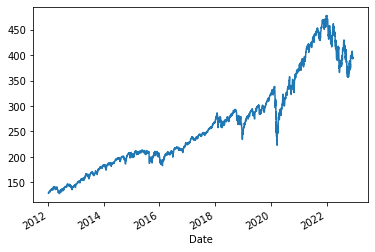

In [5]:
daily_prices['Close'].plot()

print("first",daily_prices.Close[0],"last",daily_prices.Close[-1])

In [6]:
#simple returns mean check

print(daily_returns.mean())
r = daily_returns.mean()
daily_prices.Close[0]*(1+daily_returns.mean())**(len(daily_returns))

0.00046348353602840867


461.5732451801426

In [7]:
log_returns = np.log(daily_prices.Close/daily_prices.Close.shift(1)).dropna()
log_returns

Date
2012-01-11    0.000542
2012-01-12    0.002396
2012-01-13   -0.005187
2012-01-17    0.003873
2012-01-18    0.010996
                ...   
2022-12-05   -0.018153
2022-12-06   -0.014520
2022-12-07   -0.001703
2022-12-08    0.007803
2022-12-09   -0.007498
Name: Close, Length: 2748, dtype: float64

In [8]:
#checking mean for log returns

print(log_returns.mean())

daily_prices.Close[0]*np.exp(log_returns.mean()*len(log_returns))

0.00040527734228604435


393.27999877929534

In [9]:
#log_returns.plot(kind='hist')

log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

worst_std = (worst-log_returns.mean())/log_returns.std()
best_std = (best-log_returns.mean())/log_returns.std()

print(worst_std,best_std)

-10.771355482515682 7.995790475477652


((array([-3.47840334, -3.2331426 , -3.09742928, ...,  3.09742928,
          3.2331426 ,  3.47840334]),
  array([-0.11588654, -0.10056886, -0.08131252, ...,  0.06500674,
          0.08202809,  0.08673099])),
 (0.010125383070797378, 0.00040527734228604375, 0.9369514696499543))

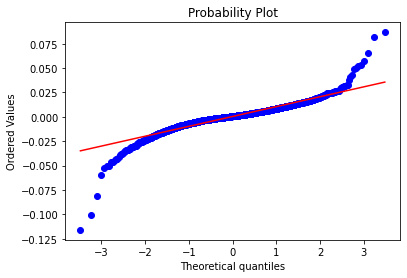

In [10]:
stats.probplot(log_returns,dist='norm',plot=pylab)

0.4828274867285747 0.0


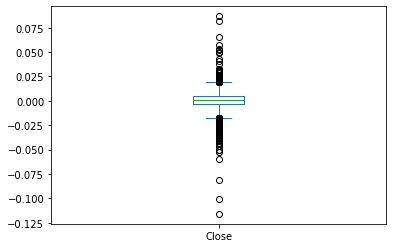

In [11]:
log_returns.plot(kind='box')
ks,pv = stats.kstest(log_returns,'norm')
print(ks,pv)

In [12]:
sw,p = stats.shapiro(log_returns)
print(sw,p)

0.8803773522377014 9.004743931751274e-42
